In [132]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [144]:
################## IMPORT CDC DATA ##########################
# data_cdc = pd.read_csv('CDCDat/Clinical_Labs.csv')
data = pd.read_csv('allvariables2.csv')

In [146]:
tots = pd.Series(data['TOTAL A']+data['TOTAL B'],name='total cases')
data['FLU']=data['FLU'].replace('<1',0)

data['CC']=data['CC'].replace('<1',0)
data['FLU_SYMP']=data['FLU_SYMP'].replace('<1',0)
data['GRIPE']=data['GRIPE'].replace('<1',0)
data['INF_SYMP']=data['INF_SYMP'].replace('<1',0)
data['INFL']=data['INFL'].replace('<1',0)
data['OSELT']=data['OSELT'].replace('<1',0)
data['PREV']=data['PREV'].replace('<1',0)
data['VACC']=data['VACC'].replace('<1',0)





In [147]:
for i in range(len(data)):
    data['FLU'].iloc[i]=int(data['FLU'].iloc[i])
    data['CC'].iloc[i]=int(data['CC'].iloc[i])
    data['VACC'].iloc[i]=int(data['VACC'].iloc[i])
    data['FLU_SYMP'].iloc[i]=int(data['FLU_SYMP'].iloc[i])
    data['GRIPE'].iloc[i]=int(data['GRIPE'].iloc[i])
    data['INF_SYMP'].iloc[i]=int(data['INF_SYMP'].iloc[i])
    data['INFL'].iloc[i]=int(data['INFL'].iloc[i])
    data['OSELT'].iloc[i]=int(data['OSELT'].iloc[i])
    data['PREV'].iloc[i]=int(data['PREV'].iloc[i])

In [145]:
sumnums = pd.Series(data['CC']+data['COUGH']+data['FLU_SYMP']+data['FLU']+data['GRIPE']+data['INF_SYMP']+data['INFL']+data['OSELT']+data['PREV']+data['VACC'],name='trendz')
sumnums.reset_index(drop=True, inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [138]:
data['WEEK']>=40 or data['WEEK']<=16

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [141]:
data = data.insert(6,'trendz',sumnums)
data

AttributeError: 'NoneType' object has no attribute 'insert'

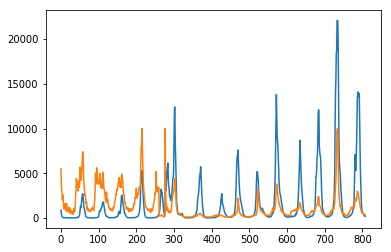

In [5]:
x=np.arange(0,809)
y=tots
plt.plot(x,y)
y=pd.Series(data['FLU_SYMP']*100)
plt.plot(x,y)

In [6]:
def derivative(y1,y2): ########### ONLY GETS DERIVATIVE OF 1 WEEK ##############
    return (y2-y1)

76


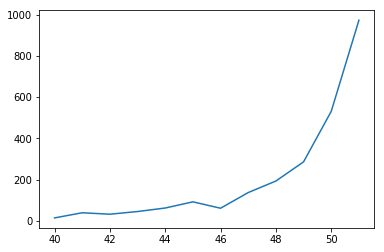

In [7]:
print(derivative(tots[46],tots[47]))
plt.plot(np.arange(40,52),tots[40:52])

In [8]:
derivs = pd.Series()
derivs_flu_symps = pd.Series()
for i in range(len(data)-1):
    derivs=derivs.append(pd.Series(derivative(tots[i],tots[i+1])))
    derivs_flu_symps=derivs_flu_symps.append(pd.Series(derivative(data['COUGH'].iloc[i],data['COUGH'].iloc[i+1])*400))
derivs.reset_index(drop=True,inplace=True)

Text(0.5, 1.0, 'First Derivative of Flu Peaks')

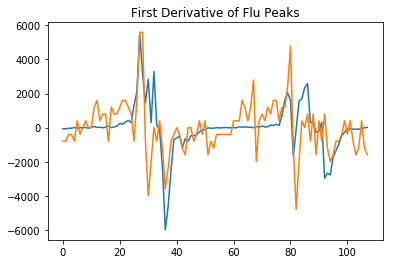

In [9]:
plt.plot(np.arange(0,len(derivs[700:])),derivs[700:])
plt.plot(np.arange(0,len(derivs_flu_symps[700:])),derivs_flu_symps[700:])
plt.title('First Derivative of Flu Peaks')

In [10]:
derivs.reset_index(drop=True,inplace=True)
derivs_flu_symps.reset_index(drop=True,inplace=True)
tot_derv = pd.concat([derivs,derivs_flu_symps],axis=1)

In [11]:
data = pd.concat([data,tot_derv],axis=1)

In [12]:
data=pd.concat([data,tots],axis=1)

In [13]:
# data['CC']=data['CC'].replace('<1',0)
# data['GRIPE']=data['GRIPE'].replace('<1',0)
# data['PREV']=data['PREV'].replace('<1',0)
# data['VACC']=data['VACC'].replace('<1',0)
# data['INF_SYMP']=data['INF_SYMP'].replace('<1',0)
# data['FLU']=data['FLU'].replace('<1',0)
# data['COUGH']=data['COUGH'].replace('<1',0)
# data['INFL']=data['INFL'].replace('<1',0)

for i in range(len(data['CC'])):
    if data['CC'].iloc[i]=='<1':
        data['CC'].iloc[i]=int(data['CC'].iloc[i])
#     if data['COUGH'].iloc[i]=='<1':
#         data['COUGH'].iloc[i]=int(data['COUGH'].iloc[i])
    data['CC'].iloc[i]=int(data['CC'].iloc[i])*4000
#     data['COUGH'].iloc[i]=int(data['COUGH'].iloc[i])*600
data.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,0,1,total cases
0,14,2004,1,6936,12.42790,853,9,304000,65,55,21,25,80,28,5.0,0.0,3.0,-357.0,-3600.0,862
1,15,2004,2,5411,9.33284,500,5,276000,56,39,16,19,71,19,4.0,0.0,2.0,-245.0,-400.0,505
2,16,2004,3,4329,6.00601,257,3,252000,55,31,14,31,30,15,3.0,0.0,3.0,-94.0,-2400.0,260
3,17,2004,4,4166,3.98464,163,3,236000,49,28,16,15,35,16,6.0,33.0,1.0,-59.0,0.0,166
4,18,2004,5,3661,2.92270,105,2,200000,49,20,16,15,26,16,5.0,0.0,1.0,-42.0,400.0,107


In [14]:
import math
sines = pd.Series()
cos = pd.Series()
for i in range(len(data)):
    sines=sines.append(pd.Series(math.sin(i*0.04)*40))
    cos = cos.append(pd.Series(math.cos(i*0.04)*40))

cos.reset_index(drop=True,inplace=True)
data=pd.concat([data,cos],axis=1)
data=data.rename(columns={0:"cos"})

sines.reset_index(drop=True,inplace=True)
data=pd.concat([data,sines],axis=1)
data=data.rename(columns={0:"sines"})

data.head()

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,...,INF_SYMP,INFL,OSELT,PREV,VACC,cos,1,total cases,cos,sines
0,14,2004,1,6936,12.42790,853,9,304000,65,55,...,80,28,5.0,0.0,3.0,-357.0,-3600.0,862,40.000000,0.000000
1,15,2004,2,5411,9.33284,500,5,276000,56,39,...,71,19,4.0,0.0,2.0,-245.0,-400.0,505,39.968004,1.599573
2,16,2004,3,4329,6.00601,257,3,252000,55,31,...,30,15,3.0,0.0,3.0,-94.0,-2400.0,260,39.872068,3.196588
3,17,2004,4,4166,3.98464,163,3,236000,49,28,...,35,16,6.0,33.0,1.0,-59.0,0.0,166,39.712345,4.788488
4,18,2004,5,3661,2.92270,105,2,200000,49,20,...,26,16,5.0,0.0,1.0,-42.0,400.0,107,39.489091,6.372728


In [15]:
data = data.rename(columns={0:'total spec derv',1:'cough derv'})

In [16]:
data['cough derv']=data['cough derv']*100

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE
862.1216165345802
Test rmse 1046.8309219312591
Average % Err:
116.48583481380948
test121.9994656001306
Train
   true         pred        error  percent err
0  1606  2831.477983  1225.477983    76.306226
1    15    91.448646    76.448646   509.657643
2   153   153.634422     0.634422     0.414655
3   547   916.739967   369.739967    67.594144
4    96   104.434427     8.434427     8.785862
5    44   104.786278    60.786278   138.150632
6    78   108.796074    30.796074    39.482147
7   620   508.506569   111.493431    17.982811
8   551   776.419084   225.419084    40.910904
9    67   104.434427    37.434427    55.872280 

test
    true         pred        error  percent err
0   1478   918.719973   559.280027    37.840327
1    208   328.885581   120.885581    58.118068
2  11374  7004.240130  4369.759870    38.418849
3   5187  6716.399341  1529.399341    29.485239
4   4304  6716.399341  2412.399341    56.050171
5    717   899.577736   182.577736    25.464119
6     87   108.796074    2

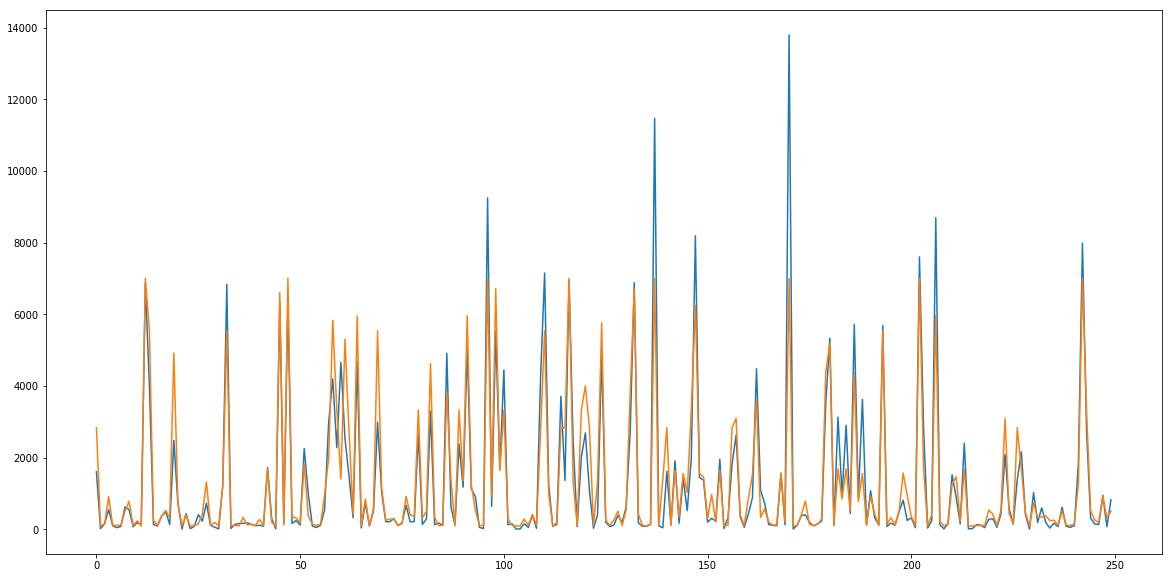

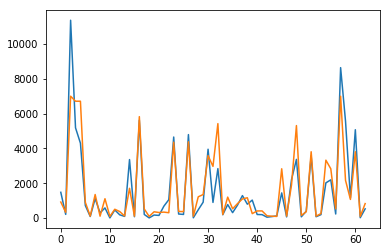

In [118]:
############# BASED ON GRAPHS, THIS IS DEFINITELY OVERFITTING
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

fig = plt.figure(figsize=(20,10))
data['FLU'] = data['FLU'].replace('<1',0)
dat = data[data['YEAR']==2004].append(data[data['YEAR']==2005]).append(data[data['YEAR']==2006]).append(data[data['YEAR']==2007]).append(data[data['YEAR']==2008]).append(data[data['YEAR']==2010])
dat = data[data['YEAR']==2011].append(data[data['YEAR']==2012]).append(data[data['YEAR']==2013]).append(data[data['YEAR']==2014]).append(data[data['YEAR']==2015]).append(data[data['YEAR']==2016])

data_train, data_val = train_test_split(dat, test_size = 0.20, random_state = 0)
y_train = data_train['total cases']
y_test = data_val['total cases']

X_train = data_train[['COUGH','CC','FLU','PREV','VACC','GRIPE','INF_SYMP','sines','cos']]
X_test = data_val[['COUGH','CC','FLU','PREV','VACC','GRIPE','INF_SYMP','sines','cos']]

from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

#clf = KernelRidge(kernel='poly',degree=3)
clf = RandomForestRegressor(max_depth=6,min_samples_leaf=10) #<<<<<<<#################################################################################
#clf = MLPRegressor(max_iter=1000,hidden_layer_sizes=200)
#clf = DecisionTreeRegressor(max_depth=8,min_samples_leaf=15)
#clf = GradientBoostingRegressor(n_estimators=200,min_weight_fraction_leaf=0.40)
#clf = ExtraTreesRegressor(n_estimators=200,min_weight_fraction_leaf=0.40)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))
y_test = np.array(y_test).reshape(len(y_test))
y_train_predict = clf.predict(X_train).reshape(len(X_train))
y_test_predict = clf.predict(X_test).reshape(len(X_test))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])
        
for i in range(len(y_test_predict)):
    if y_test_predict[i]<0.0:
        y_test_predict[i]=abs(y_test_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())
test_rmse = np.sqrt(((y_test-y_test_predict)**2).mean())

print('RMSE')
train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict),'percent err': abs(100*(y_train_predict-y_train)/y_train )}
test_deeta = {'true': y_test,"pred": y_test_predict,"error": abs(y_test-y_test_predict),'percent err': abs(100*(y_test_predict-y_test)/y_test )}

print(train_rmse)
print('Test rmse '+ str(test_rmse))
print("Average % Err:")
train_compare = pd.DataFrame(train_deeta)
test_compare = pd.DataFrame(test_deeta)
train_compare['percent err']=train_compare['percent err'].replace(np.inf,np.nan)
test_compare['percent err']=test_compare['percent err'].replace(np.inf,np.nan)

train_compare[train_compare['percent err']==np.nan]
test_compare[test_compare['percent err']==np.nan]
print(train_compare['percent err'].mean())
print('test'+str(test_compare['percent err'].mean()))

print("Train")
print(train_compare.head(10), "\n")
print('test')
print(test_compare.head(10), "\n")

x=np.arange(0,len(train_compare))
y=train_compare['true']#.iloc[0:150]
plt.plot(x,y)

y=train_compare['pred']#.iloc[0:150]
plt.plot(x,y)
plt.show()
x=np.arange(0,len(test_compare))
y=test_compare['true']#.iloc[0:150]
plt.plot(x,y)

y=test_compare['pred']#.iloc[0:150]
plt.plot(x,y)

plt.show()


RMSE
1020.6018206036633
Average % Err:
833.1979478818431
Train
   true     pred   error  percent err
0     6   192.75  186.75  3112.500000
1    13   133.50  120.50   926.923077
2     4   132.50  128.50  3212.500000
3    44   212.00  168.00   381.818182
4    39   418.00  379.00   971.794872
5  4657  3746.00  911.00    19.561950
6   400   628.00  228.00    57.000000
7    17   162.75  145.75   857.352941
8   197   676.00  479.00   243.147208
9    36   293.50  257.50   715.277778 



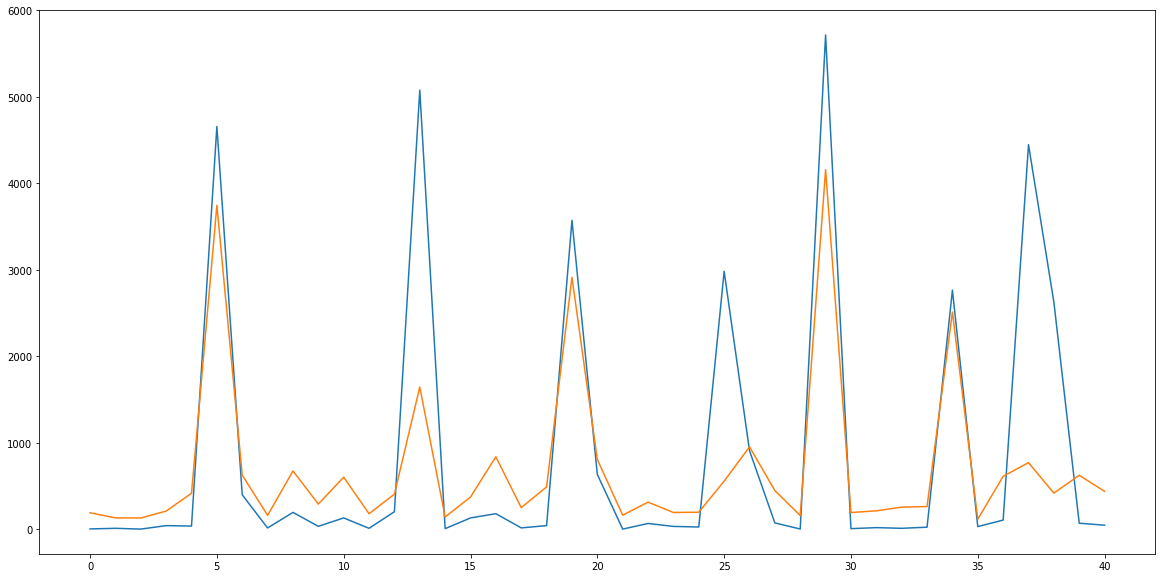

In [110]:
############# BASED ON GRAPHS, THIS IS DEFINITELY OVERFITTING
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

fig = plt.figure(figsize=(20,10))
data['FLU'] = data['FLU'].replace('<1',0)
dat = data[data['YEAR']==2011]

data_train, data_val = train_test_split(dat, test_size = 0.20, random_state = 0)
y_train = data_train['total cases']
y_val = data_val['total cases']

X_train = data_train[['COUGH','CC','FLU','PREV','VACC','GRIPE','INF_SYMP','sines','cos']]
X_val = data_val[['COUGH','CC','FLU','PREV','VACC','GRIPE','INF_SYMP','sines','cos']]

#from sklearn.linear_model import ElasticNet

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())
print('RMSE')
train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict),'percent err': abs(100*(y_train_predict-y_train)/y_train )}
print(train_rmse)
print("Average % Err:")
train_compare = pd.DataFrame(train_deeta)
train_compare['percent err']=train_compare['percent err'].replace(np.inf,np.nan)

train_compare[train_compare['percent err']==np.nan]
print(train_compare['percent err'].mean())

print("Train")
print(train_compare.head(10), "\n")

x=np.arange(0,len(train_compare))
y=train_compare['true']#.iloc[0:150]
plt.plot(x,y)

y=train_compare['pred']#.iloc[0:150]
plt.plot(x,y)

# y=(data['cos'].iloc[:200]
#    +data['sines'].iloc[:200])*4-8000
# plt.plot(x,y)

In [70]:
def percent_error(tru, pred):
    df = np.array([])
    for i in range(len(tru)):
        if tru[i] == 0: 
            welp= 0.0001
        else:
            welp = tru
        try: 
            df=np.append(df,[100*(pred-tru[i])/welp])
        except:
            df=df
            
    return df

In [25]:
import math
sines = pd.Series(name='sine')
cos = pd.Series(name='cos')
for i in range(len(data)):
    sines=sines.append(pd.Series(math.sin(i)*2000))
    cos = cos.append(pd.Series(math.cos(i)*2000))

In [26]:
sines.reset_index(drop=True,inplace=True)
data=pd.concat([data,sines],axis=1)

In [27]:
data=data.rename(columns={0:'sines'})

In [28]:
cos.reset_index(drop=True,inplace=True)
data=pd.concat([data,cos],axis=1)
data=data.rename(columns={0:'cos'})

In [29]:
data['sines']=abs(data['sines'])

In [30]:
data['cos']=abs(data['cos'])

In [31]:
data=data.drop(['sines','cos'],axis=1)

In [39]:
from numpy import exp, array, random, dot

class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))


if __name__ == "__main__":

    #Intialise a single neuron neural network.
    neural_network = NeuralNetwork()

    print ("Random starting synaptic weights: ")
    print (neural_network.synaptic_weights)
    
    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    dat0 = [int(data['CC'].iloc[0]), int(data['COUGH'].iloc[0]), int(data['FLU'].iloc[0])]
    dat1 = [int(data['CC'].iloc[1]), int(data['COUGH'].iloc[1]), int(data['FLU'].iloc[1])]
    dat2 = [int(data['CC'].iloc[2]), int(data['COUGH'].iloc[2]), int(data['FLU'].iloc[2])]
    dat3 = [int(data['CC'].iloc[3]), int(data['COUGH'].iloc[3]), int(data['FLU'].iloc[3])]
    training_set_inputs = array([dat0, dat1, dat2, dat3])
    training_set_outputs = array([[data['total cases'].iloc[0], data['total cases'].iloc[1], data['total cases'].iloc[2], data['total cases'].iloc[3]]]).T

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print ("New synaptic weights after training: ")
    print (neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print ("Considering new situation [1, 0, 0] -> ?: ")
    dat4 = [int(data['CC'].iloc[4]), int(data['COUGH'].iloc[4]), int(data['FLU'].iloc[4])]
    print (neural_network.think(array(dat4)))
    print(data['total cases'].iloc[4])

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[6565.66771606]
 [5599.78920775]
 [1508.11572923]]
Considering new situation [1, 0, 0] -> ?: 
[1.]
107
